<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_4_reprezentacja_danych_i_in%C5%BCynieria_cech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We wcześniejszych notatnikach dane pojawiały się na ogół jako dwuwymiarowa tablica liczb zmiennoprzecinkowych, gdzie każda kolumna to cecha ciągła opisująca punkty danych. W wielu zastosowaniach dane mamy gromadzone w postaci cech kategorialnych. Przykładami może być marka produktu, kolor, dział, w którym jest sprzedawany itp. Są to wszystkie cechy opisujące próbkę, które nie różnią się w sposób ciągły.

Sposób reprezentacji danych może mieć ogromny wpływ na wydajność modelu uczenia maszynowego, często znacznie większy niż dostrojenie modelu. Określanie, jak najlepiej przedstawić dane dla konkretnego zastosowania, nazywamy inżynierią cech.

# Zmienne kategorialne.

Są to wszelkie zmienne, które opisują próbkę danych nie pod kątem ilościowym, a jakościowym. Pochodzą one z ustalonej listy możliwych wartości. Z reguły zapisane są one w postaci tekstowej, toteż skorzystanie z nich w modelu uczenia maszynowego wymaga odpowiedniego potraktowania. Załóżmy, że chcemy na podstawie danych z takimi cechami wyuczyć klasyfikator regresji logistycznej. Ogólny wzór na predykcję ma sens tylko wtedy, gdy cechy x[0], x[1], ..., x[p] to liczby, ale nie wtedy, gdy są to konkretne wartości, typu płeć, poziom wykształcenia itp.

## One-hot-encoding (kodowanie jeden z N, zmienne fikcyjne).

Najczęściej stosowany sposób reprezentacji zmiennych kategorialnych. Ideą jest zastąpienie zmiennej kategorialnej jedną lub większą liczbą nowych cech o wartościach 0 lub 1. Wprowadziwszy jedną nową cechę na kategorię, możemy reprezentować dowolną liczbę kategorii.

Pracować będziemy na zbiorze danych Adult Path. Mamy cechę workclass, która przyjmuje cztery możliwe wartości. Aby je zakodować, tworzymy cztery nowe cechy, która ma wartość 1, jeżeli workclass ma dla próbki odpowiednią wartość, w przeciwnym wypadku (jedna z trzech pozostałych wartości) wartość wyniesie 0. Dlatego właśnie nazywamy to kodowaniem jeden z N lub typu one-hot.

Kodowanie tego typu umożliwia zarówno biblioteka Scikit-learn, jak i Pandas. Poniżej sposób z biblioteki Pandas, który jest nieco łatwiejszy.

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import os
import mglearn

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status',
                          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                          'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


## Sprawdzanie danych kategorialnych zakodowanych jako ciągi znaków.

Po przeczytaniu takiego zbioru danych warto sprawdzić, czy kolumna faktycznie zawiera sensowne dane kategorialne. Gdy pracujemy z danymi, które zostały wprowadzone przez ludzi, może nie istnieć ustalony zestaw kategorii, a różnice w pisowni, wielkości liter itp. mogą wymagać standaryzacji (np. określenie płci jako "Męska", "mężczyzna", "M" itp.). Sprawdźmy zawartość kolumny przy pomocy funkcji value_counts z biblioteki Pandas, która wyświetli unikalne wartości i częstość ich wystąpień.

In [2]:
print(data.sex.value_counts())

sex
Male      21790
Female    10771
Name: count, dtype: int64


W kolumnie sex występują dokładnie dwie wartości dla płci. Takie dane możemy zakodować metodą jeden z N. W prawdziwym zastosowaniu powinniśmy przyjrzeć się wszystkim kolumnom i znajdującym się w nich wartościom, ale dla celów naukowych taka prezentacja jest wystarczająca.

Sposobem z biblioteki Pandas na kodowanie one-hot jest funkcja get_dummies, która automatycznie przekształca wszystkie kolumny typu object (czyli przeważnie ciągi znaków) lub kategoryczne (categorical).

Uwaga: powinniśmy użyć parametru dtype=int, który zwróci wartości 0 lub 1. Domyślnym typem jest typ bool, więc zwrócone wartości to True lub False.

In [3]:
print(f"Original features:\n {list(data.columns)}\n")
data_dummies = pd.get_dummies(data, dtype=int)
print(f"Features after get_dummies:\n {list(data_dummies.columns)}")

Original features:
 ['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income']

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'o

Cechy ciągłe age i hours-per-week pozostały nienaruszone. Cechy kategorialne zostały za to przekształcone na tyle cech, ile unikalnych wartości jest w każdej kolumnie.

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Aby przekonwertować powyższy DataFrame na tablicę NumPy, używamy atrybutu values, a dopiero na niej uczymy model uczenia maszynowego. Przed uczeniem modelu należy oddzielić od danych zmienną docelową, zakodowaną w dwóch kolumnach z przedrostkiem income.

Wyodrębniamy więc tylko kolumny zawierające cechy - od age do occupation_ Transport-moving.

In [5]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print(f"X.shape: {X.shape} y.shape: {y.shape}")

X.shape: (32561, 44) y.shape: (32561,)


Teraz dane są przedstawione tak, że funkcje biblioteki Scikit-learn mogą z nim bez trudu pracować.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


Ważnym jest, aby zapewnić, że wartości kategorialne są jednakowo reprezentowane w zbiorze treningowym i testowym. Dlatego też funkcję get_dummies należy wywołać na obiekcie DataFrame przed podziałem na dane uczące i testowe, dobrą praktyką jest też sprawdzenie, czy nazwy kolumn w obu zbiorach się pokrywają.

## Kodowanie zmiennych kategorialnych w formie liczbowej.

Zmienne kategorialne w powyższym wypadku zostały zaprezentowane jako ciągi znaków. Często jednak się zdarza, że w celu uniknięcia błędów czy też dla ułatwienia przechowywania zmienne kategorialne są kodowane jako liczby całkowite. Np. kolumna, której nazwa wskazuje na zmienną kategorialną, zawierać może liczby i dla kogoś, kto spojrzy na tabelę po raz pierwszy, nie będzie oczywiste, czy taką zmienną traktować jako ciągłą, czy jako kategorialną. Jeżeli liczby wskazują np. status zatrudnienia, to jednak wydaje się jasne, że nie powinien być on modelowany przez jedną zmienną ciągłą. Jeśli nie ma uporządkowania między kodowanymi semantykami (np. cecha workclass z powyższego zbioru), należy ją traktować jako dyskretną. Dla takich przypadków, jak np. oceny od 1 do 5 gwiazdek, kodowanie zależne jest od zadania i używanego algorytmu.

Funkcja get_dummies domyślnie traktuje wszystkie liczby jako ciągłe i nie tworzy dla nich zmiennych fikcyjnych. Ten problem można obejść albo przy użyciu klasy OneHotEncoder z biblioteki Scikit-learn, albo wskazując funkcji get_dummies kolumny, jakie chcemy przekonwertować. Utwórzmy ramkę danych z dwiema kolumnami: jedną z liczbami całkowitymi, drugą z ciągami znaków.

In [7]:
demo_df = pd.DataFrame({
                        'Numerical feature': [0, 1, 2, 1],
                        'Categorical feature': ['socks', 'fox', 'socks', 'box']
                        })
demo_df

,Numerical feature,Categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


Użycie funkcji get_dummies zakoduje tylko drugą kolumnę tekstową, nie zmieniając pierwszej w postaci liczby całkowitej.

In [8]:
pd.get_dummies(demo_df)

,Numerical feature,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


Można użyć parametru columns dla funkcji get_dummies i jawnie wskazać, które kolumny należy zakodować.

In [9]:
pd.get_dummies(demo_df, columns=['Numerical feature', 'Categorical feature'], dtype=int)

,Numerical feature_0,Numerical feature_1,Numerical feature_2,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# Dzielenie, dyskretyzacja, modele liniowe i drzewa.

Najlepszy sposób reprezentacji danych zależy zarówno od ich znaczenia, jak i algorytmu używanego do predykcji. Modele liniowe i modele oparte na drzewach mają mocno zróżnicowane właściwości, jeżeli mowa o ich pracy z różnymi reprezentacjami cech.

Wróćmy do zbioru Make Wave, który posiada tylko jedną cechę wejściową, i porównajmy model regresji liniowej i drzewa decyzyjnego w tym zbiorze.

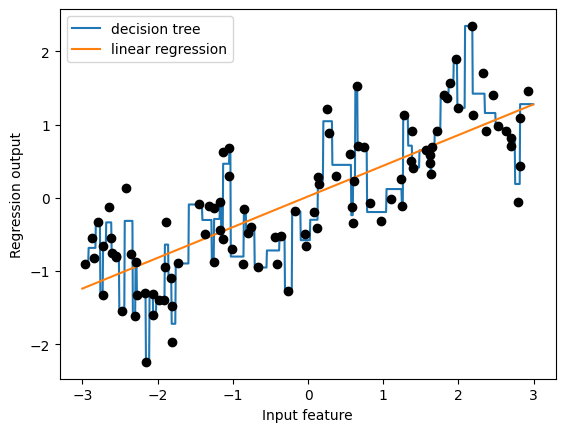

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Modele liniowe mogą modelować tylko relacje liniowe, które są liniami w przypadku pojedynczej cechy, podczas gdy drzewo decyzyjne może budować bardziej złożone modele. Występuje tu jednak silna zależność od reprezentacji danych.

Jednym ze sposobów podniesienia wydajności modelu liniowego w przypadku danych ciągłych jest użycie grupowania danych, zwanego też dyskretyzacją cech, aby podzielić dane na wiele cech. Wyobraźmy sobie, że chcemy podzielić zakres wejściowy dla cechy na ustaloną liczbę przedziałów (np. 10 przedziałów od -3 do 3). Punkt danych reprezentowany jest przez to, do jakiego przedziału należy. Funkcja np.linspace pozwoli zdefiniować 10 przedziałów od -3 do 3 w równych odstępach.

In [11]:
bins = np.linspace(-3, 3, 11)
print(f"Bins: {bins}")

Bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Następnie dla każdego punktu danych rejestrujemy, do jakiego przedziału danych do zaliczamy - funkcja np.digitize.

In [12]:
which_bin = np.digitize(X.reshape(-1), bins=bins)
print(f"X: {X[:5]}")
print(f"which_bin: {which_bin[:5]}")

X: [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
which_bin: [ 4 10  8  6  2]


Udało nam się przekształcić cechą ciągłą w zbiorze danych na cechę kategorialną, która wskazuje na przedział, w którym mieszczą się dane. Aby użyć na nich modelu uczenia maszynowego, przekształcić możemy ją z wykorzystaniem klasy OneHotEncoder. Działa ona analogicznie do metody pd.get_dummies.

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin.reshape(-1, 1))
X_binned = encoder.transform(which_bin.reshape(-1, 1))
print(f"X_binned[:5]:\n {X_binned[:5]}")

X_binned[:5]:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Przekształcony zbiór danych X_binned składa się teraz z 10 cech.

In [14]:
print(f"X_binned.shape: {X_binned.shape}")

X_binned.shape: (100, 10)


Stwórzmy nowy model regresji liniowej i nowy model drzewa decyzyjnego na danych zakodowanych metodą one-hot.

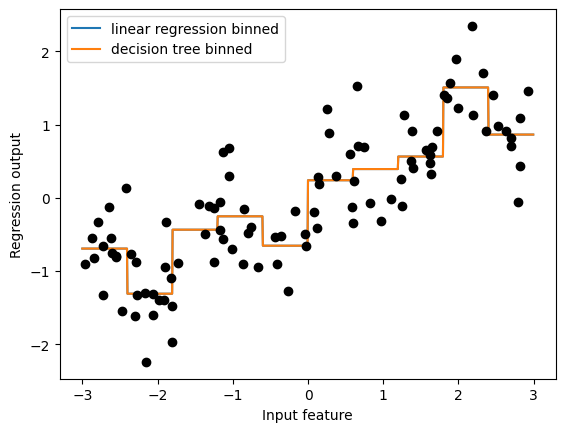

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins).reshape(-1, 1))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Obie linie - dla regresji liniowej i drzewa decyzyjnego - znajdują się teraz jedna na drugiej, bowiem modele predykują identycznie. Dla każdego przedziału prognozowana jest dokładnie ta sama wartość, ponieważ cechy są stałe w każdym przedziale. Model liniowy stał się bardziej elastyczny, gdyż dla każdego przedziału przyjmuje teraz inną wartość. Spadła natomiast elastyczność modelu drzewa decyzyjnego; dyskretyzacja ogólnie nie jest dla tych modeli korzystna, bowiem te modele uczą się, jaka kategoryzacja jest najbardziej przydatna do prognozowania na tych danych. Jeżeli istnieją dobre powody, by użyć modelu liniowego dla określonych danych (np. bardzo dużych i wielowymiarowych, ale z niektórymi elementami o nieliniowych relacjach z wynikiem), grupowanie może pomóc w zwiększeniu wydajności modelowania.

# Interakcje i wielomiany.

Dodanie cech interakcji i cech wielomianowych to często używane sposoby wzbogacenia reprezentacji danych. Są one głównie wykorzystywane w modelach liniowych.

Przypomnijmy sobie zbiór danych Make Wave. Model liniowy wyuczył się stałej wartości dla każdego przedziału. Możliwe jednak jest, aby modele nauczyły się nie tylko przesunięć, ale również nachyleń; dokonać tego możemy przez dodanie z powrotem pierwotnej cechy jako kolejnego wymiaru.

In [16]:
X_combined = np.hstack([X, X_binned])
print(f"X_combined.shape: {X_combined.shape}")

X_combined.shape: (100, 11)


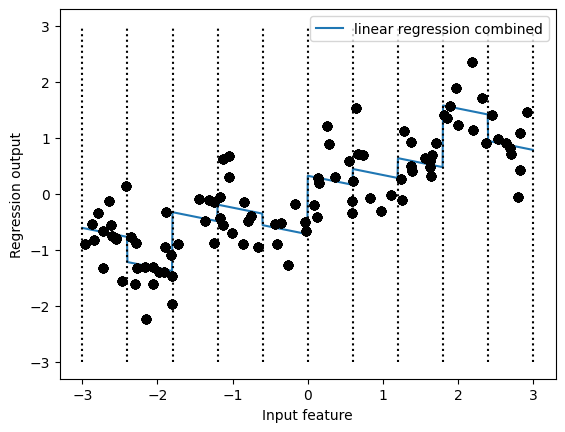

In [17]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc="best")
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.plot(X[:, 0], y, 'o', c='k')

Model nauczył się przesunięcia razem z nachyleniem, które opada od lewej do prawej i jest wspólne dla wszystkich przedziałów. Z tego też powodu nie jest ono zbyt pomocne; chcemy, aby model znalazł osobne nachylenie dla każdego przedziału. Osiągnąć to można, dodając interakcję lub cechę produktu, która wskazuje, w jakim przedziale znajduje się punkt danych i gdzie znajdziemy go na osi X. Cecha ta jest wynikiem iloczynu cechy oryginalnej i wskaźnika przedziału.

In [18]:
X_product = np.hstack([X_binned, X * X_binned])
print(f"X_product.shape: {X_product.shape}")

X_product.shape: (100, 20)


Zbiór danych ma teraz 20 cech: wskaźniki przedziału i iloczyn wskaźnika z oryginalną cechą. Każdy przedział uzyskał własne przesunięcie i nachylenie.

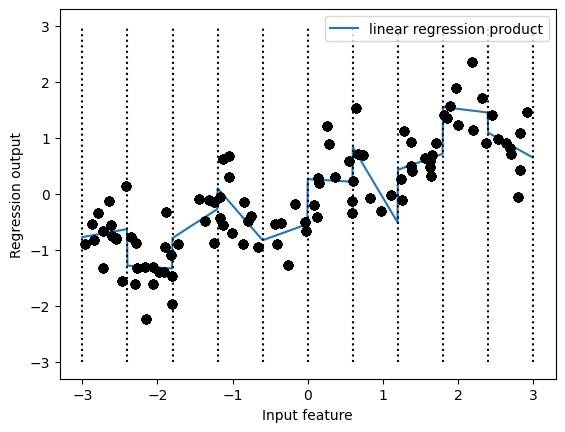

In [19]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc="best")
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.plot(X[:, 0], y, 'o', c='k')

Innym sposobem na rozszerzenie cech ciągłej jest użycie wielomianów cech oryginalnych. Zaimplementowano to w klasie PolynomialFeatures w module preprocessing.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(f"X_poly.shape: {X_poly.shape}")

X_poly.shape: (100, 10)


Użycie 10. stopnia daje 10 cech. Porównajmy wpisy X_poly z oryginalnymi wpisami X.

In [21]:
print(f"X[0]: {X[:5]}")
print(f"X_poly[0]: {X_poly[:5]}")

X[0]: [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly[0]: [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


Wydobędziemy również semantykę cech; metoda get_feature_names_out dostarczy wykładnik dla każdej cechy.

In [22]:
print(f"Polynomial features:\n {poly.get_feature_names_out()}")

Polynomial features:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


Pierwsza kolumna odpowiada dokładnie X, a kolejne kolumny to potęgi pierwszego wpisu. Użycie cech wielomianowych wraz z modelem regresji liniowej tworzy model klasycznej regresji wielomianowej.

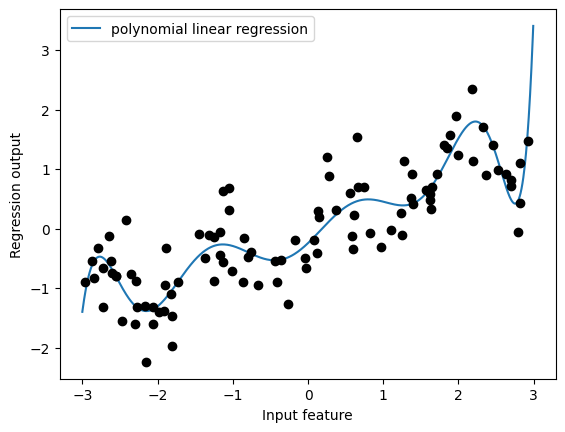

In [23]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Cechy wielomianowe zapewniają bardzo płynne dopasowanie do jednowymiarowych danych, ale wielomiany wysokiego stopnia zachowują się zwykle nieprzewidywalnie na granicach lub w regionach o niewielkiej ilości danych. Dla porównania wyuczymy na oryginalnych danych model SVM.

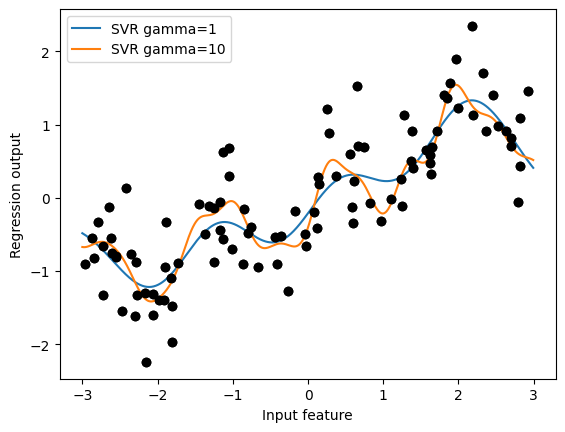

In [24]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    plt.plot(X[:, 0], y, 'o', c='k')
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.legend(loc="best")

Bardziej złożony model był w stanie tworzyć równie złożone prognozy, co regresja wielomianowa, bez konieczności jawnej transformacji cech.

Dla bardziej realistycznego zastosowania interakcji i wielomianów przyjrzymy się zbiorowi danych Boston Housing. Załadujmy dane i przeskalujmy je przy pomocy klasy MinMaxScaler.

In [25]:
from mglearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled.shape: {X_train_scaled.shape}")
print(f"X_test_scaled.shape: {X_test_scaled.shape}")

X_train_scaled.shape: (379, 13)
X_test_scaled.shape: (127, 13)


Wyodrębnijmy cechy wielomianowe i interakcje do stopnia drugiego.

In [26]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train_poly.shape: (379, 105)


Pierwotne cechy zostały rozszerzone do 105 cech interakcji. Elementy te reprezentują wszystkie możliwe interakcje między dwoma różnymi oryginalnymi cechami oraz kwadraty oryginalnych cech. Argument degree=2 oznacza, że bierzemy pod uwagę wszystkie cechy będące wynikiem maksymalnie dwóch cech oryginalnych.

In [27]:
print(f"Polynomial feature names:\n {poly.get_feature_names_out()}")

Polynomial feature names:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


Pierwszą nową cechą jest cecha stała, oznaczona wartością "1", kolejne elementy to cechy oryginalne (od "x0" do "x12"), kombinacje cech oryginalnych (od "x0 x1" do "x11 x12") oraz cechy oryginalne podniesione do kwadratu (od "x0^2" do x12^2"). Porównajmy wyniki na danych z interakcją i bez niej, stosując klasę Ridge.

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Interakcje i cechy wielomianowe spowodowały znaczną poprawę wydajności podczas korzystania klasy Ridge. Inaczej przedstawia się sprawa przy korzystaniu z bardziej złożonego modelu lasu losowego - okazuje się, że nawet bez dodatkowych cech jego wydajność jest wyższa, zaś ich dodanie spowodowało nieznaczny spadek wydajności uczenia.

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.805
Score with interactions: 0.769


# Nieliniowe transformacje jednowymiarowe.

Są one często przydatne do przekształceń cech, zwłaszcza przy stosowaniu funkcji matematycznych, jak log, exp cos czy sin. Pierwsze dwie funkcje mogą pomóc, dostosowując względnie skalę dla cech, co jest szczególnie ważne dla modeli liniowych czy sieci neuronowej. Sin i cos przydają się zaś, gdy mamy do czynienia z danymi kodującymi określone wzorce.

Większość modeli sprawdza się najlepiej, gdy cechy (a w regresji również zmienna zależna) są dystrybuowane w luźnym rozkładzie Gaussa, tj. histogram każdej cechy przypomina kształtem krzywą dzwonową. Prosty i wydajny sposób na taką transformację danych to użycie funkcji log lub exp. Często taki rodzaj transformacji sprawdza się, gdy pracujemy z danymi zliczeniowymi w formie liczb całkowitych. Liczby tutaj są zawze nieujemne i zgodne z określonymi wzorcami statystycznymi.

Użyjmy syntetycznego zbioru danych zliczeń, w których wartości są całkowite i nieujemne, a odpowiedź - ciągła.

In [30]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print(f"First 10 samples: {X[:10]}")
print(f"First 10 targets: {y[:10]}")

First 10 samples: [[61 20 22]
 [91 59  4]
 [29  9  8]
 [10 15 41]
 [12 13 12]
 [19 50  4]
 [11  6  0]
 [20 27  3]
 [97  0 13]
 [ 7 49 48]]
First 10 targets: [2.926 4.744 1.439 0.57  1.231 1.405 0.305 1.618 2.784 0.405]


Pierwsze 10 próbek nie powie nam wiele, jeżeli chodzi o możliwość dostrzeżenia określonego wzorca. Rozkład wartości stanie się wyraźniejszy, gdy zliczymy pojawienie się każdej wartości.

In [31]:
print(f"Number of X appearances: {np.bincount(X[:, 0])}")

Number of X appearances: [23 43 50 58 53 67 70 46 44 36 40 32 32 32 29 28 21 19 11 21 16 13 15 21
 10 15 12  6  7  7  3  7  5  7  4  0  6  8  3  2  5  4  2  0  6  4  0  3
  4  1  2  3  1  2  1  3  2  0  1  1  1  1  2  3  0  0  2  0  1  3  0  0
  0  1  2  0  1  0  0  0  0  0  0  2  0  0  0  1  0  0  1  1  0  2  0  0
  1  1  0  0  1  1  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  1]


Najczęściej występujące wartości to 3 i 6 (bincount numeruje od zera), liczba wystąpień wyższych wartości szybko spada, ale istnieją też wysokie wartości o pojedynczych wystąpieniach.

Text(0.5, 0, 'Value')

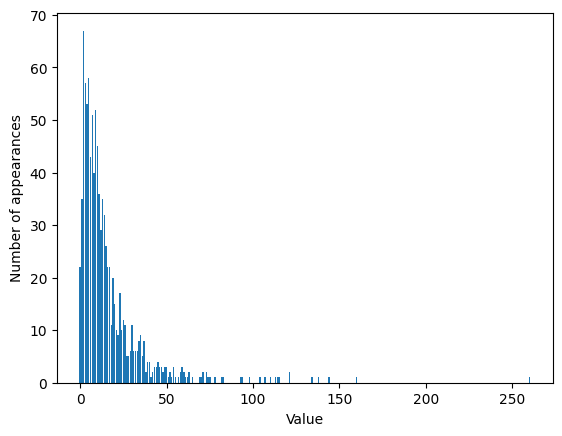

In [32]:
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Ten rodzaj rozkładania wartości jest w praktyce powszechny ze względu na odwzorowanie rozkładu Poissona. Większość modeli liniowych nie radzi sobie z tym jednak za dobrze. Spróbujmy dopasować model Ridge do takich danych.

In [33]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Test set score: 0.602


Wynik R^2 sugeruje, że model Ridge nie jest w stanie uchwycić prawidłowo związku między X a y. Dlatego pomocne może być zastosowanie transformacji logarytmicznej. W danych pojawia się wartość 0, dla której logarytm nie jest zdefiniowany; musimy więc obliczyć log(x + 1).

In [34]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Model stał się mniej asymetryczny i nie ma już dużych outlierów.

Text(0.5, 0, 'Value')

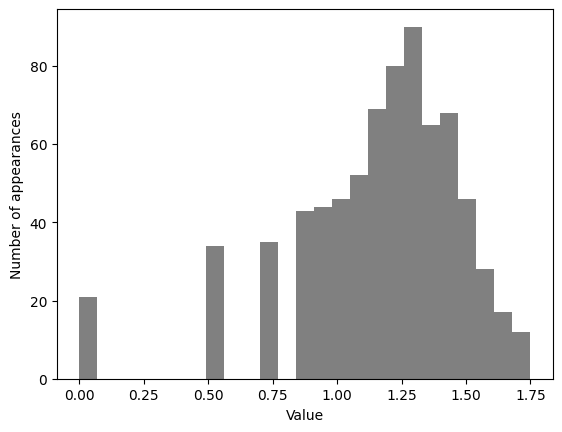

In [35]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Zbudowany na tych danych model regresji grzbietowej jest dopasowany znacznie lepiej.

In [36]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test set score: {:.3f}".format(score))

Test set score: 0.879


Znalezienie takiej transformacji, która działa najlepiej dla każdej kombinacji danych i modelu, bywa sporym wyzwaniem. Rzadko w praktyce pojawiają się zbiory danych, w których cechy mają te same właściwości, zwykle przekształcamy tylko podzbiór danych. Czasami nawet każdą cechę trzeba przekształcić inaczej. Dla modeli opartych na drzewach decyzyjnych transformacje takowe są nieistotne, ale mogą być niezbędne dla modeli liniowych.

Czasem dobrym pomysłem może być (w regresji) przekształcenie zmiennej docelowej y, np. użycie transformacji log(y + 1).

Podsumowując, wielomiany, grupowanie i interakcje mogą mieć ogromny wpływ na działanie modeli na zbiorze danych, szczególnie w przypadku mniej złożonych modeli, jak liniowe czy naiwne modele bayesowskie. Modele oparte na drzewa często są w stanie samodzielnie wykryć ważne interakcje i zwykle nie wymagają jawnej transformacji cech. Maszyny SVM, k-najbliższych sąsiadów czy sieci neuronowe mogą skorzystać na ww. przekształceniach, ale implikacje tego zazwyczaj są mniej jasne niż w przypadku modeli liniowych.

# Automatyczny wybór cech.

Dodawanie nowych cech lub korzystanie z wielowymiarowych zbiorów danych sprawia, że modele są bardziej złożone, co zwiększa ryzyko nadmiernego dopasowania. Dobrym pomysłem jest zmniejszenie liczby cech tylko do najprzydatniejszych i odrzucenie pozostałych, co może uprościć modele i doprowadzić do ich lepszej generalizacji.

Istnieją trzy podstawowe strategie:
- statystyka jednoczynnikowa,
- selekcja oparta na modelu,
- selekcja iteracyjna.

Metody te są nadzorowane, do dopasowania modelu potrzebują celu. Oznacza to, że należy podzielić dane na zbiór treningowy i testowy, a następnie dopasować wybór cechy tylko do danych ze zbioru treningowego.

## Statystyki jednoczynnikowe.

W tym podejściu obliczamy, czy istnieje statystycznie istotny związek między każdą cechą a celem, a następnie wybierane są cechy z największą pewnością. Kluczową właściwością tychże testów jest to, że uwzględniają indywidualnie każdą cechę - dlatego są jednoczynnikowe. W klasyfikacji takie podejście znane jest jako analiza wariancji (ANOVA). Cecha jest odrzucana, jeżeli ma charakter informacyjny tylko w związku z inną cechą. Testy te są szybkie w obliczeniach, nie wymagają budowy modelu, ale też są niezależne od modelu, który może być stosowany po wyborze cechy.

Do jednoczynnikowego wyboru cech należy wybrać funkcję testu, zazwyczaj f_classif do klasyfikacji lub f_regression do regresji, oraz metodę odrzucania cech w odniesieniu do wartości p określonych w teście. Wszystkie metody wykorzystują wartość graniczną dla odrzucenia cech o zbyt wysokiej wartości p, tj. takie, co do których prawdopodobieństwo związania z celem jest niskie. Metody różnią się sposobem obliczania tej wartości, przy czym najprostsza zaimplementowana jest w klasie SelectKBest, która wybiera stałą liczbę cech, lub SelectPercentile, która wybiera stały % cech.

Zastosujemy metodę SelectPercentile do zbioru danych Breast Cancer, do którego dodamy trochę kilka nieinformacyjnych cech szumu.

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


Liczba cech została zmniejszona o połowę. Przy pomocy metody get_support możemy uzyskać maskę logiczną wybranych cech.

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

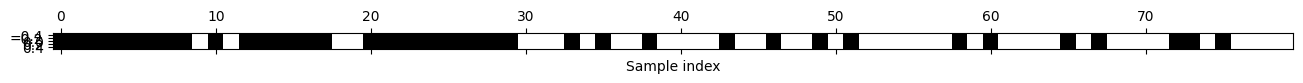

In [38]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

Większość wybranych cech to elementy oryginalne, usunięta została większość szumu. Oryginalne cechy nie zostały odzyskane w sposób doskonały.

Porównajmy wydajność regresji logistycznej dla wszystkich cech i wydajność przy użyciu tylko wybranych cech.

In [39]:
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


Co ciekawe, mimo usunięcia szumu, wydajność nieco spadła. Był to jednak prosty, syntetyczny przykład, zwykle dane realne są mieszane. Jeśli istnieje tak wiele cech, że zbudowanie na nich modelu jest niewykonalne, lub mamy podejrzenie, że wiele cech jest nieinformacyjnych, jednoczynnikowy wybór cech może być bardzo przydatny.